In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qec import RepetitionCode

In [2]:
rep = RepetitionCode(
    distance = 2,
    depolarize1_rate = 0.05,
    depolarize2_rate = 0.05
)

rep.build_memory_circuit(number_of_rounds=1)
rep.memory_circuit.diagram()

q0: -DEPOLARIZE1(0.05)-------------------@-DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)------------------------------------------------M:rec[1]-----------OBSERVABLE_INCLUDE:L0*=rec[1]-DETECTOR:D1=rec[2]*rec[1]*rec[0]-
                                         | |
q1: -DEPOLARIZE1(0.05)-------------------|-|-----------------DEPOLARIZE1(0.05)-@-DEPOLARIZE2(0.05)-----------------------------------------------M:rec[2]----------------------OBSERVABLE_INCLUDE:L0*=rec[2]----
                                         | |                                   | |
q2: -R-----------------DEPOLARIZE1(0.05)-X-DEPOLARIZE2(0.05)-------------------X-DEPOLARIZE2(0.05)-DEPOLARIZE1(0.05)-M:rec[0]-DETECTOR:D0=rec[0]----------------------------------------------------------------

In [3]:
num_shots = 10**4
prob_errors = np.linspace(0, 0.1, 10)

collected_stats = {}

for distance in [3, 5, 7, 11]:
    
    temp_logical_error_rate = []
    
    for prob_error in prob_errors:
        
        rep = RepetitionCode(
            distance = distance,
            depolarize1_rate = prob_error,
            depolarize2_rate = prob_error
        )
        rep.build_memory_circuit(number_of_rounds=distance*3)
        num_errors_sampled = rep.compute_logical_errors(num_shots)
        temp_logical_error_rate.append(num_errors_sampled / num_shots)
        
    collected_stats[distance] = temp_logical_error_rate

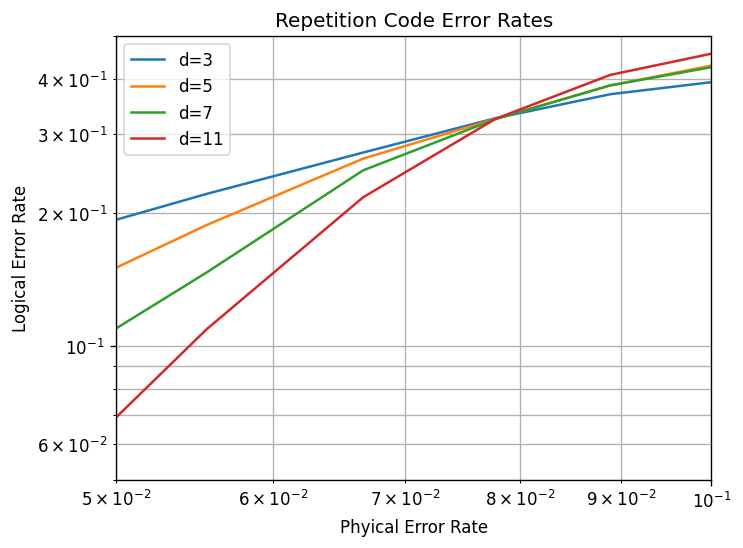

In [4]:
fig, ax = plt.subplots(1, 1)

for distance in collected_stats.keys():
    ax.plot(prob_errors, collected_stats[distance], label=f"d={distance}")
    
ax.set_ylim(5e-2, 5e-1)
ax.set_xlim(5e-2, 1e-1)
ax.loglog()
ax.set_title("Repetition Code Error Rates")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)